# Question 1:  Stock Analysis Using Python

In [92]:
# Import Required Packages 

import yfinance as yf

# Specify the stock symbol and date range
stock_symbol = "MSFT"
start_date = "2015-01-01"
end_date = "2019-12-31"

# Download the stock data
msft_data = yf.download(stock_symbol, start=start_date, end=end_date, interval="1mo")

# Display the first few rows of the data
print(msft_data.head())


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-01  46.660000  47.910000  40.349998  40.400002  35.021561  918966800
2015-02-01  40.590000  44.299999  40.230000  43.849998  38.012253  656509700
2015-03-01  43.669998  44.189999  40.540001  40.660000  35.497780  824335300
2015-04-01  40.599998  49.540001  40.119999  48.639999  42.464626  874535300
2015-05-01  48.580002  48.910000  46.020000  46.860001  40.910622  633072800


In [93]:

# Retrieve historical data using yfinance
msft_data = yf.download(msft_ticker, start=start_date, end=end_date)


# Compute log returns
msft_data['Log_Return'] = np.log(msft_data['Adj Close'] / msft_data['Adj Close'].shift(1))


# Compute log returns

print(msft_data['Log_Return'].head())

[*********************100%%**********************]  1 of 1 completed
Date
2015-01-02         NaN
2015-01-05   -0.009239
2015-01-06   -0.014786
2015-01-07    0.012625
2015-01-08    0.028994
Name: Log_Return, dtype: float64


In [97]:
# Compute log returns
msft_data['Log_Return'] = np.log(msft_data['Adj Close'] / msft_data['Adj Close'].shift(1))

# Calculate annualized return
average_log_return = np.mean(msft_data['Log_Return'])
annualized_return = (1 + average_log_return) ** 252 - 1  # Assuming daily returns, adjust 252 for other frequencies

# Print the results
print(f"Average Log Return: {average_log_return*100}")
print(f"Annualized Return: {annualized_return*100}")

Average Log Return: 0.10532025867199034
Annualized Return: 30.377954184860023


In [95]:
# Calculate annualized volatility
volatility = np.std(msft_data['Log_Return']) * np.sqrt(252)  # Assuming daily returns, adjust 252 for other frequencies

# Print the results
print(f"Annualized Volatility: {volatility*100}")

Annualized Volatility: 23.25861540614136


In [40]:
pip install yesg

Note: you may need to restart the kernel to use updated packages.


In [41]:
import yesg

# change timeframe here!!! 

In [48]:
ESG = yesg.get_historic_esg('MSFT')
ESG

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,66.00,78.00,59.00,63.00
2014-10-01,66.00,78.00,59.00,63.00
2014-11-01,66.00,78.00,59.00,63.00
2014-12-01,66.00,78.00,59.00,63.00
2015-01-01,66.00,78.00,59.00,63.00
...,...,...,...,...
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,13.75,0.46,8.06,5.23
2022-06-01,NaN,NaN,NaN,NaN


In [43]:
ESG.new = pd.DataFrame.dropna(ESG)
ESG.new

,Total-Score,E-Score,S-Score,G-Score
Date,,,,
2014-09-01,66.00,78.00,59.00,63.00
2014-10-01,66.00,78.00,59.00,63.00
2014-11-01,66.00,78.00,59.00,63.00
2014-12-01,66.00,78.00,59.00,63.00
2015-01-01,66.00,78.00,59.00,63.00
...,...,...,...,...
2021-05-01,14.63,0.42,9.37,4.83
2021-09-01,13.26,0.46,8.06,4.73
2022-02-01,13.26,0.46,8.06,4.73


Text(0.5, 1.0, 'ESG Score for Microsoft Inc.')

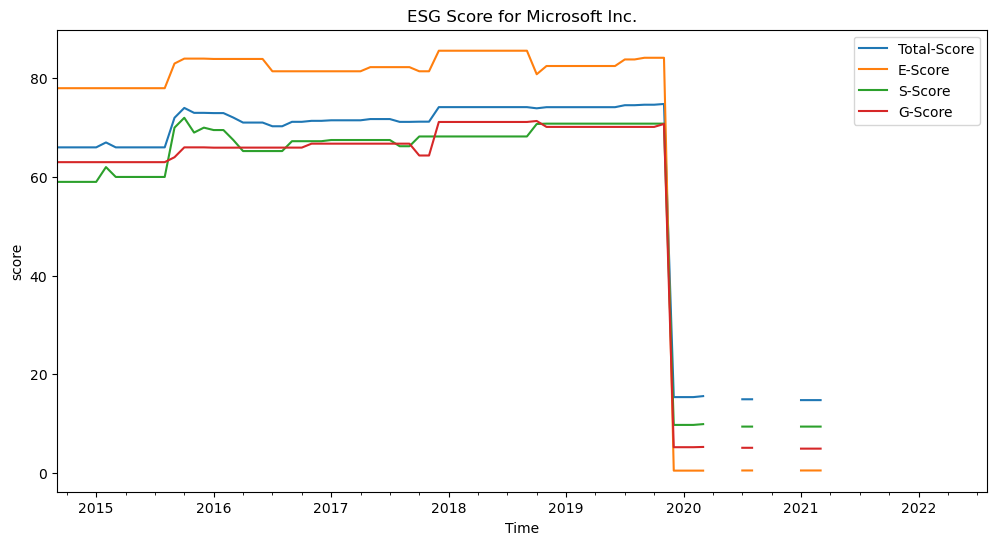

In [108]:
ESG.plot(figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('score')
plt.title('ESG Score for Microsoft Inc.')

# Question 2: Climate Analysis for Birthplace 

In [155]:
# Import Required Packages 

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily



In [156]:
#Specify Timeframe for CDD --> January - March for Southern Hermisphere 
start = datetime(2022, 1, 1)
end = datetime(2022, 3, 31)

In [157]:
# Specify location using co-ordinates for Johannesburg 

location = Point(-26.2041, 28.0473, 1694)

In [158]:
# Extract data for specified time period 

data = Daily(location, start, end)
data = data.fetch()

In [159]:
# Specify base temparature and formula for CDD 

T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]

In [160]:
# Calculative the Total CDD over the specified timeframe 

total_cdd = sum(cdds)


In [161]:
print("Total CDD:", total_cdd)


Total CDD: 81.60000000000001


In [162]:
#Specify Timeframe for CDD --> October to December in Southern Hermisphere 
start = datetime(2022, 10, 1)
end = datetime(2022, 12, 31)

In [163]:
# Specify location using co-ordinates for Johannesburg 

location = Point(-26.2041, 28.0473, 1694)

In [164]:
# Extract data for specified time period 

data = Daily(location, start, end)
data = data.fetch()

In [165]:
# Calculative the Total CDD over the specified timeframe 

total_cdd = sum(cdds)


In [166]:
print("Total CDD:", total_cdd)

Total CDD: 81.60000000000001


In [167]:
#Specify Timeframe for HDD --> April to Spetember in Southern Hemisphere
start = datetime(2022, 4, 1)
end = datetime(2022, 9, 30)

In [168]:
# Specify location using co-ordinates for Johannesburg 

location = Point(-26.2041, 28.0473, 1694)

In [169]:
# Extract data for specified time period 

data = Daily(location, start, end)
data = data.fetch()

In [170]:

total_hdd = sum(hdds)


In [171]:
print("Total HDD:", total_hdd)


Total HDD: 37.29999999999999
